In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

pd.options.mode.chained_assignment = None


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
train_data = pd.read_csv("/kaggle/input/titanicdataset/train.csv")
test_data = pd.read_csv("/kaggle/input/titanicdataset/test.csv")
submit = pd.read_csv('/kaggle/input/gender-submission/gender_submission.csv')
#test_data = pd.read_csv("/kaggle/input/titanicdataset/test.csv")
### show the columns of data
train_data.head(5)


/kaggle/input/titanicdataset/train.csv
/kaggle/input/titanicdataset/test.csv
/kaggle/input/gender-submission/gender_submission.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
## check the null values

train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
## check the null values

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [158]:
## describe data's descriptive statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
## describe data's descriptive statistics
test_data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [160]:
# Combine train and test data 
data = pd.concat([train_data, test_data], ignore_index=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [161]:
data.reset_index(inplace=True, drop=True)

In [162]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

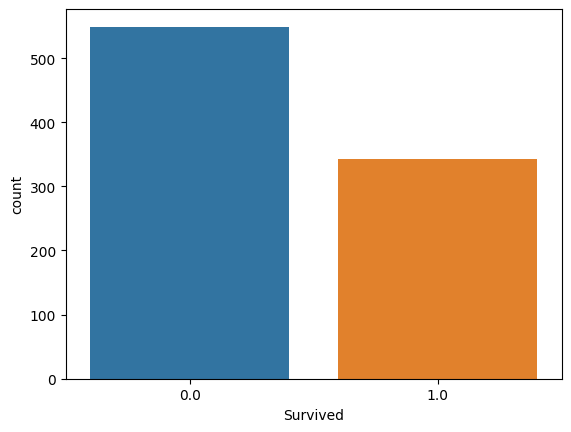

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.countplot(data['Survived'], data=data)
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

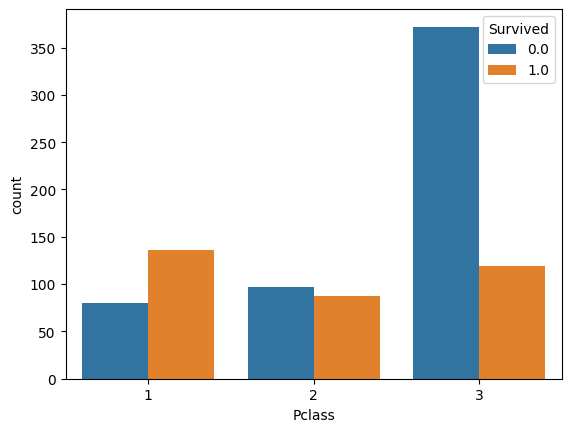

In [164]:
data

import matplotlib.pyplot as plt

sns.countplot(x='Pclass', hue='Survived', data=data)

#sns.countplot(data['Pclass'], hue=data['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

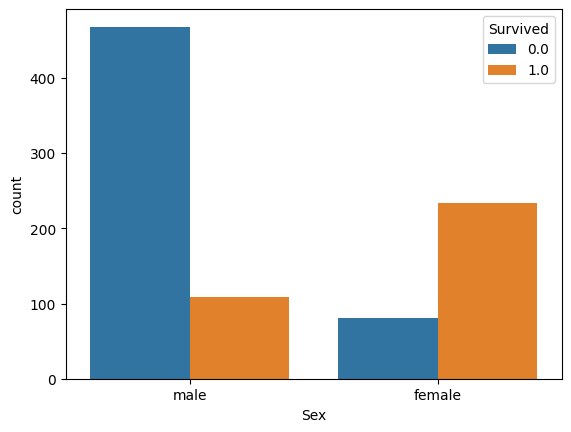

In [165]:
sns.countplot(x='Sex', hue='Survived', data=data)

<Axes: xlabel='Embarked', ylabel='count'>

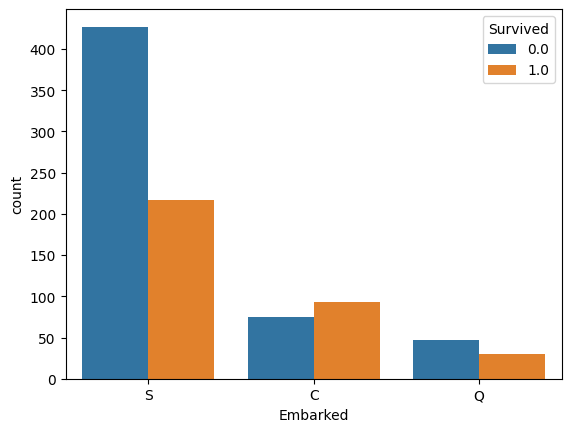

In [166]:
sns.countplot(x='Embarked', hue='Survived', data=data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


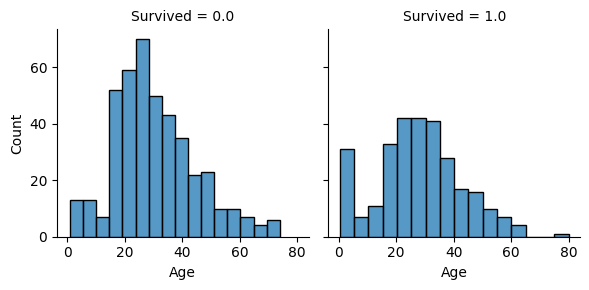

In [167]:
g = sns.FacetGrid(data, col='Survived')
#g = sns.FacetGrid(data, col='Survived')

g.map(sns.histplot, 'Age', kde=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


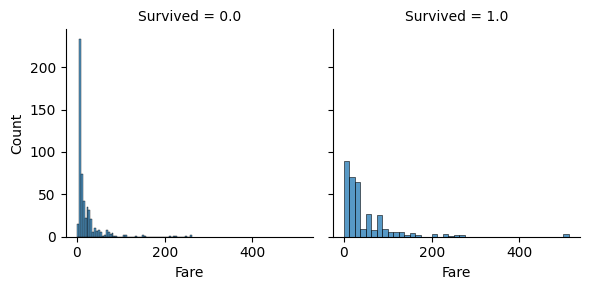

In [168]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Fare', kde=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


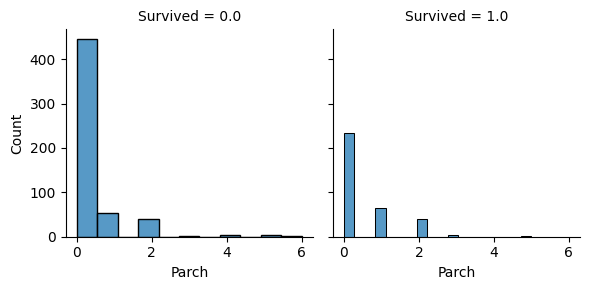

In [169]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Parch', kde=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


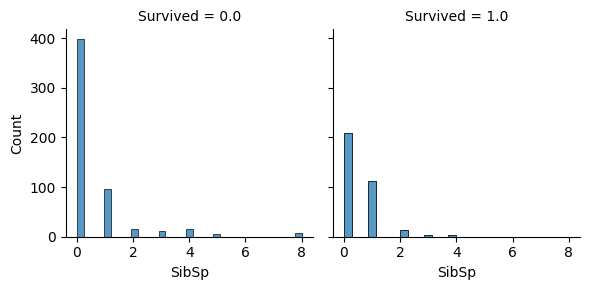

In [170]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'SibSp', kde=False)

In [171]:
data['Family_Size'] = data['Parch'] + data['SibSp']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


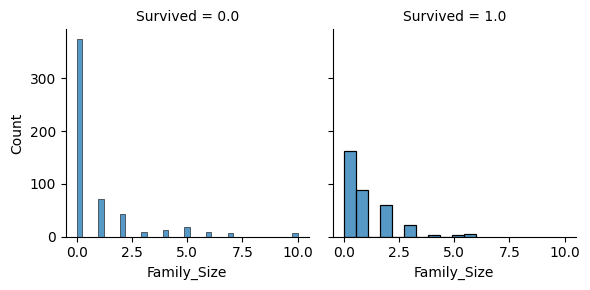

In [172]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Family_Size', kde=False)

In [173]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [174]:
data['Name'].str.split(", ", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [175]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [176]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [177]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [178]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [179]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [180]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [181]:
data.groupby('Title2')['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [182]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [183]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [184]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.000000,17,55,451,26
1.000000,23,130,87,102


In [185]:
list(data.groupby(['Title2', 'Pclass'])['Age'].mean().items())[:3]

[(('Master', 1), 6.984),
 (('Master', 2), 2.7572727272727273),
 (('Master', 3), 6.090000000000001)]

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [187]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')


data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

<Axes: xlabel='Ticket_info', ylabel='count'>

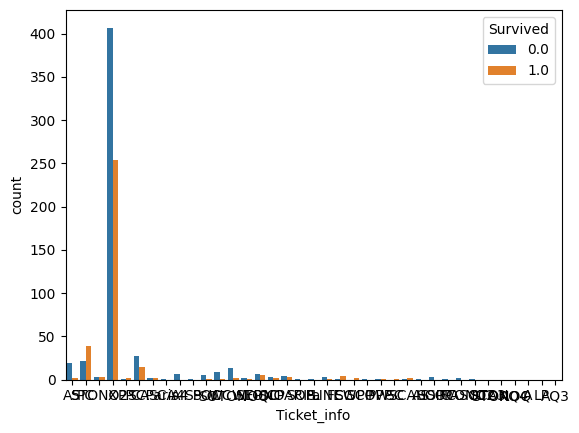

In [188]:
sns.countplot(x='Ticket_info', hue='Survived', data=data)

In [189]:
data['Embarked'] = data['Embarked'].fillna('S')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [190]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [191]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [192]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<Axes: xlabel='Cabin', ylabel='count'>

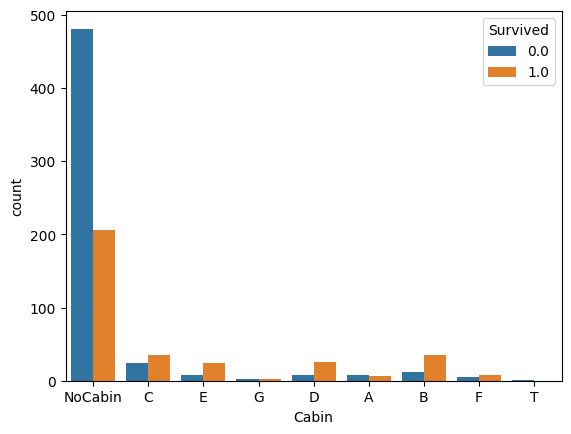

In [193]:
#sns.countplot(data['Cabin'], hue=data['Survived'])
sns.countplot(x='Cabin', hue='Survived', data=data)

In [194]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [195]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
#data = dataAgeNull.append(dataAgeNotNull)
data = pd.concat([dataAgeNull, dataAgeNotNull])

data.reset_index(inplace=True, drop=True)

In [196]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [197]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.000000,2,7.2500,2,1,1,2,2,7
264,1.0,38.000000,0,71.2833,0,0,1,3,14,2
265,1.0,26.000000,2,7.9250,2,0,0,1,31,7
266,1.0,35.000000,2,53.1000,0,0,1,3,36,2
267,0.0,35.000000,2,8.0500,2,1,0,2,36,7
...,...,...,...,...,...,...,...,...,...,...
973,0.0,27.000000,2,13.0000,1,1,0,2,36,7
974,1.0,19.000000,2,30.0000,0,0,0,1,36,1
176,0.0,19.099409,2,23.4500,2,0,3,1,34,7
975,1.0,26.000000,0,30.0000,0,1,0,2,36,2


In [198]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [199]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.264997
2,Fare,0.163890
6,Title2,0.152698
0,Age,0.131891
3,Pclass,0.091048
5,Family_Size,0.070839
8,Cabin,0.067029
7,Ticket_info,0.031735
1,Embarked,0.025873


In [200]:
rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [201]:
submit

https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
